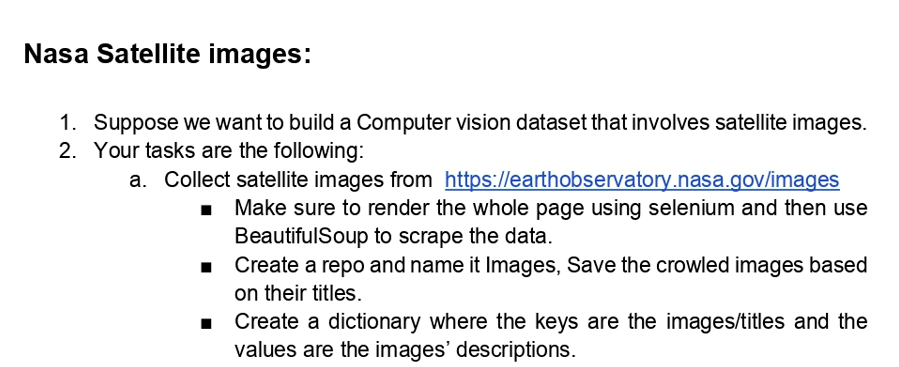

In [1]:
import requests
import os

# Define URL and headers
url = 'https://earthobservatory.nasa.gov/images/getRecords?page='
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Set image directory
image_directory = "C:\\Users\\Mamun\\A_Python_Learning\\Python_folder\\Integrify\\Nasa_Images"

if not os.path.exists(image_directory):
    os.makedirs(image_directory)

image_count = 0
    
# Loop through pages
for page in range(1, 2960): 
    page_url = url + str(page)
    print()
    print(f"Page Number: {page}")    
    
    # Get JSON data for page
    try:
        response = requests.get(page_url, headers=headers)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}, skipping page {page}")
        continue
        
    # Download images from page
    for record in data['data']:
        image_url = record['image_path'] + record['thumbnail_file']
        title = record['title']
        
        # Replace special characters(i.e.: ? or some other) in the title with hyphens
        filename = "".join(c if c.isalnum() or c in ['.', '-'] else ' ' for c in title) 
        
        # Append the file extension to the filename
        file_extension = image_url.split('.')[-1]
        filename = f"{filename}.{file_extension}"
        
        filepath = os.path.join(image_directory, filename)
        if not os.path.exists(filepath):
            image_count += 1
            print(f"Image {image_count}: {filename} downloaded.")
            
            try:
                image_response = requests.get(image_url)
                image_response.raise_for_status()
                with open(filepath, 'wb') as f:
                    f.write(image_response.content)
            except requests.exceptions.RequestException as e:
                print(f"Error downloading {filename}: {e}")
        else:
            print(f"{filename} already downloaded.")    



Page Number: 1
Image 1: Fires Scorch Western Canada.jpg downloaded.
Image 2: Deadly Blooms in the Gulf of Mannar.jpg downloaded.
Image 3: Popocat eacute petl Volcano Keeps on Puffing.jpg downloaded.
Image 4: Esp iacute ritu Santo Archipelago.jpg downloaded.
Image 5: Tulare Lake Grows.jpg downloaded.

Page Number: 2
Image 6: Freddy Brings Lean Times to Malawi.jpg downloaded.
Image 7: Fires in Jalisco.jpg downloaded.
Image 8: Utah rsquo s Dark Canyon Complex.jpg downloaded.
Image 9: Seasonal Flooding of the Diamantina River.jpg downloaded.
Image 10: Country Roads.jpg downloaded.

Page Number: 3
Image 11: Mangroves on Eighty Mile Beach.jpg downloaded.
Image 12: Sea of Pollen Visible From Space.jpg downloaded.
Image 13: Bloomin rsquo  Atlantic.jpg downloaded.
Image 14: Shrinking Reservoirs in Catalonia.jpg downloaded.
Image 15: An Awesome Aurora.jpg downloaded.

Page Number: 4
Image 16: Smoky Skies in Western Australia.jpg downloaded.
Image 17: Curious Tracks Criss-Cross an Icy Fjord.jpg 

### A total of 10,000 images were downloaded from NASA's satellite website.

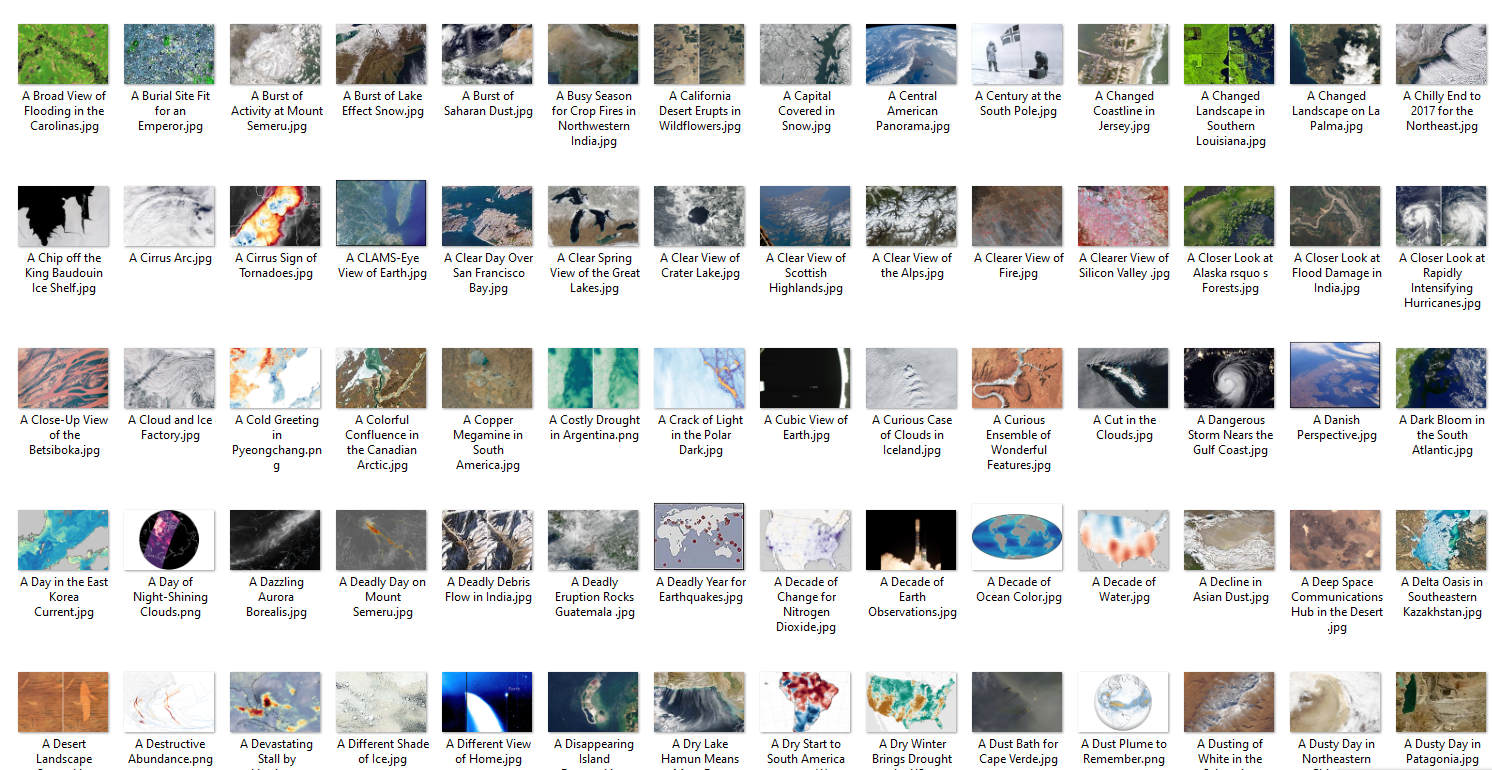